# Bandidos multibrazo
El objetivo de este ejercicio es programar las diferentes estrategias para equilibrar exploración y explotación.

### 1. Algoritmo incremental epsilon greedy:

<img src="simple_bandit_algo.PNG">

### 2. Algoritmo no estacionario con alfa constante:

<img src="non_stationary.PNG">

### 3. Algoritmo con cota superior de confianza:

<img src="UCB.PNG">

In [25]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
#pip3 install tqdm
from tqdm import tqdm
import pdb

class Bandit:
    # @k_arm: # de brazos
    def __init__(self, k_arm=10, true_reward=0.):
        self.k = k_arm
        self.true_reward = true_reward
    
    def reset(self):
        # recompensa real para cada acción:
        self.q_true = np.random.randn(self.k) + self.true_reward
        
    def step(self, action):
        # genera una recompensa bajo N(recompensa real, 1)
        reward = np.random.randn() + self.q_true[action]
        return reward
    
class SimpleBanditAlgo:
    # @epsilon: proabilidad de exploración para el algoritmo epsilon-greedy
    # @initial: initial estimation for each action
    def __init__(self, initial, epsilon, k_arm=10):
        self.epsilon = epsilon
        self.initial = initial
        self.k = k_arm
        self.indices = np.arange(self.k)
        self.reset()
        
    def reset(self):
        # estimación de cada acción
        self.q_estimation = np.zeros(self.k) + self.initial
        # # de veces que se eligió cada acción
        self.action_count = np.zeros(self.k)
        
    def act(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.indices)
        q_best = np.max(self.q_estimation)
        return np.random.choice([action for action, q in enumerate(self.q_estimation) if q == q_best])
    
    def update(self, action, reward):
        self.action_count[action] += 1
        ### COMPLETAR la próxima línea ###
        # self.q_estimation[action] += 

    
class ConstantStepSizeAlgo:
    # @epsilon: proabilidad de exploración para el algoritmo epsilon-greedy
    # @initial: initial estimation for each action
    # @alpha: step
    def __init__(self, initial, epsilon, alpha, k_arm=10):
        self.epsilon = epsilon
        self.initial = initial
        self.alpha = alpha
        self.k = k_arm
        self.indices = np.arange(self.k)
        self.reset()
    
    def reset(self):
        # estimación de cada acción
        self.q_estimation = np.zeros(self.k) + self.initial
        # # de veces que se eligió cada acción
        self.action_count = np.zeros(self.k)
        
    def act(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.indices)
        q_best = np.max(self.q_estimation)
        return np.random.choice([action for action, q in enumerate(self.q_estimation) if q == q_best])
    
    def update(self, action, reward):
        self.action_count[action] += 1
        ### COMPLETAR la próxima línea ###
        # self.q_estimation[action] +=

class UCBAlgo:
    # @epsilon: proabilidad de exploración para el algoritmo epsilon-greedy
    # @initial: initial estimation for each action
    # @alpha: step
    def __init__(self, initial, epsilon, alpha, UCB_param, k_arm=10):
        self.epsilon = epsilon
        self.initial = initial
        self.alpha = alpha
        self.UCB_param = UCB_param
        self.k = k_arm
        self.indices = np.arange(self.k)
        self.reset()
        
    def reset(self):
        # estimación de cada acción
        self.q_estimation = np.zeros(self.k) + self.initial
        # # de veces que se eligió cada acción
        self.action_count = np.zeros(self.k)
        self.time = 0
    
    def act(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.indices)
       
        ### COMPLETAR la próxima línea ###
        #UCB_estimation = 
        q_best = np.max(UCB_estimation)
        return np.random.choice([action for action, q in enumerate(UCB_estimation) if q == q_best])
    
    def update(self, action, reward):
        self.time += 1
        self.action_count[action] += 1
        self.q_estimation[action] += self.alpha * (reward - self.q_estimation[action])

def simulate(runs, time, bandit, algos):
    rewards = np.zeros((len(algos), runs, time))
    for i, algo in enumerate(algos):
        for r in tqdm(range(runs)):
            bandit.reset()
            algo.reset()
            for t in range(time):
                action = algo.act()
                reward = bandit.step(action)
                algo.update(action, reward)
                rewards[i, r, t] = reward
                    
    rewards = rewards.mean(axis=1)
    return rewards


 95%|█████████▍| 949/1000 [00:34<00:01, 27.67it/s]


 85%|████████▍ | 847/1000 [00:33<00:05, 28.07it/s]


 92%|█████████▏| 922/1000 [00:31<00:02, 29.51it/s]


 56%|█████▌    | 562/1000 [00:33<00:28, 15.28it/s]


100%|██████████| 1000/1000 [00:58<00:00, 17.64it/s]

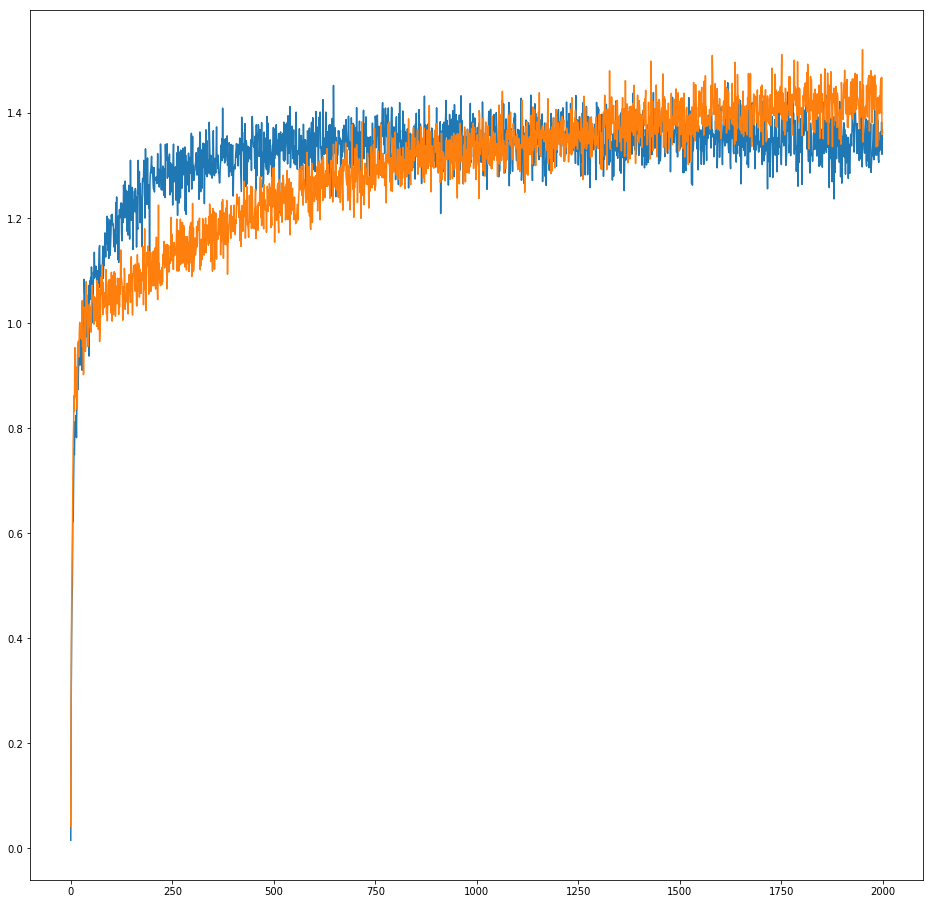

In [30]:
algos = [SimpleBanditAlgo(0, 0.1), SimpleBanditAlgo(0, 0.01), ConstantStepSizeAlgo(0, 0.1, 0.1), UCBAlgo(0, 0.1, 0.1, 2)]
bandit = Bandit()
rewards = simulate(1000, 2000, bandit, algos)

plt.figure(figsize=(16, 16))
plt.plot(rewards[0])
plt.plot(rewards[1])
plt.plot(rewards[2])
plt.plot(rewards[3])
